In [1]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

# Evolution of the worlds biggest exporters: USA vs China

## Load the Dataset and select the indicator and countries

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


It has different indicators for different countries with the year and value of the indicator. 

### How many years of data do we have ?

In [5]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

### What's the range of years?

In [6]:
print(min(years)," to ",max(years))

1960  to  2015


In [7]:
data.set_index(['Year']).head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1.335609e+02
1960,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,8.779760e+01
1960,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,6.634579e+00
1960,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,8.102333e+01
1960,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,3.000000e+06


### Create masks to select the export indicator and the countries USA and China

In [8]:
# mask_export = data['IndicatorCode'] == 'NE.EXP.GNFS.CD' TX.VAL.MRCH.CD.WT
mask_export = data['IndicatorCode'] == 'TX.VAL.MRCH.CD.WT'
mask_usa = data['CountryCode'] == 'USA'
mask_chn = data['CountryCode'] == 'CHN'

Let's apply the mask for USA:

In [9]:
data[mask_export & mask_usa].set_index(['Year']).head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Value
Year,,,,,
1960,United States,USA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,2.060100e+10
1961,United States,USA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,2.103700e+10
1962,United States,USA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,2.171400e+10
1963,United States,USA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,2.338700e+10
1964,United States,USA,Merchandise exports (current US$),TX.VAL.MRCH.CD.WT,2.665000e+10


### Create the dataframe we will use for plotting

In [10]:
# export columns for China and USA, indexed on Year, export values in billion dollars
exports = pd.DataFrame({}, index=data.Year.unique())
exports['ExportChn'] = data[mask_export & mask_chn].set_index(['Year']).Value / 1e9
exports['ExportUsa'] = data[mask_export & mask_usa].set_index(['Year']).Value / 1e9
exports.head()

,ExportChn,ExportUsa
1960,2.57128,20.601
1961,1.94166,21.037
1962,1.91323,21.714
1963,2.03103,23.387
1964,2.25038,26.650


### Add some derived data for additional plots to give better insight

In [11]:
# exports of China related to the export of the USA
exports['ChnWrtUsa'] = exports.ExportChn / exports.ExportUsa
exports['UsaWrtUsa'] = 1

# changes of the exports year by year
exports['deltaChn'] = exports.ExportChn.diff()
exports['deltaUsa'] = exports.ExportUsa.diff()

# percent changes of the exports
exports['percentDeltaChn'] = exports.deltaChn / exports.ExportChn * 100
exports['percentDeltaUsa'] = exports.deltaUsa / exports.ExportUsa * 100

# smoothen the percent changes of the exports by taking moving averages over 10 years
exports['percentDeltaChnMA'] = exports.percentDeltaChn.rolling(window=10, center=True).mean()
exports['percentDeltaUsaMA'] = exports.percentDeltaUsa.rolling(window=10, center=True).mean()

exports.loc[2000:2005, :]

,ExportChn,ExportUsa,ChnWrtUsa,UsaWrtUsa,deltaChn,deltaUsa,percentDeltaChn,percentDeltaUsa,percentDeltaChnMA,percentDeltaUsaMA
2000,249.203,781.918,0.318707,1,54.272,86.121,21.778229,11.014071,14.203477,4.302059
2001,266.098,729.100,0.364968,1,16.895,-52.818,6.349165,-7.244274,14.549783,4.025470
2002,325.596,693.103,0.469766,1,59.498,-35.997,18.273566,-5.193600,16.536161,4.597507
2003,438.228,724.771,0.604643,1,112.632,31.668,25.701690,4.369380,16.860067,4.731843
2004,593.326,814.875,0.728119,1,155.098,90.104,26.140435,11.057401,18.279466,5.916654
2005,761.953,901.082,0.845598,1,168.627,86.207,22.130893,9.567054,15.797481,3.529158


### Evolution of the exports since 2000

In [12]:
exports.loc[2000:, ['ExportUsa', 'ExportChn', 'percentDeltaUsa', 'percentDeltaChn']].dropna()

,ExportUsa,ExportChn,percentDeltaUsa,percentDeltaChn
2000,781.918000,249.203,11.014071,21.778229
2001,729.100000,266.098,-7.244274,6.349165
2002,693.103000,325.596,-5.193600,18.273566
2003,724.771000,438.228,4.369380,25.701690
2004,814.875000,593.326,11.057401,26.140435
2005,901.082000,761.953,9.567054,22.130893
2006,1025.967000,968.978,12.172419,21.365294
2007,1148.199000,1220.456,10.645541,20.605249
2008,1287.442000,1430.693,10.815478,14.694767
2009,1056.043000,1201.612,-21.911892,-19.064473


In 2007 China took over the leading role of merchandise exporter

### Let's see how exports have changed over time for both countries

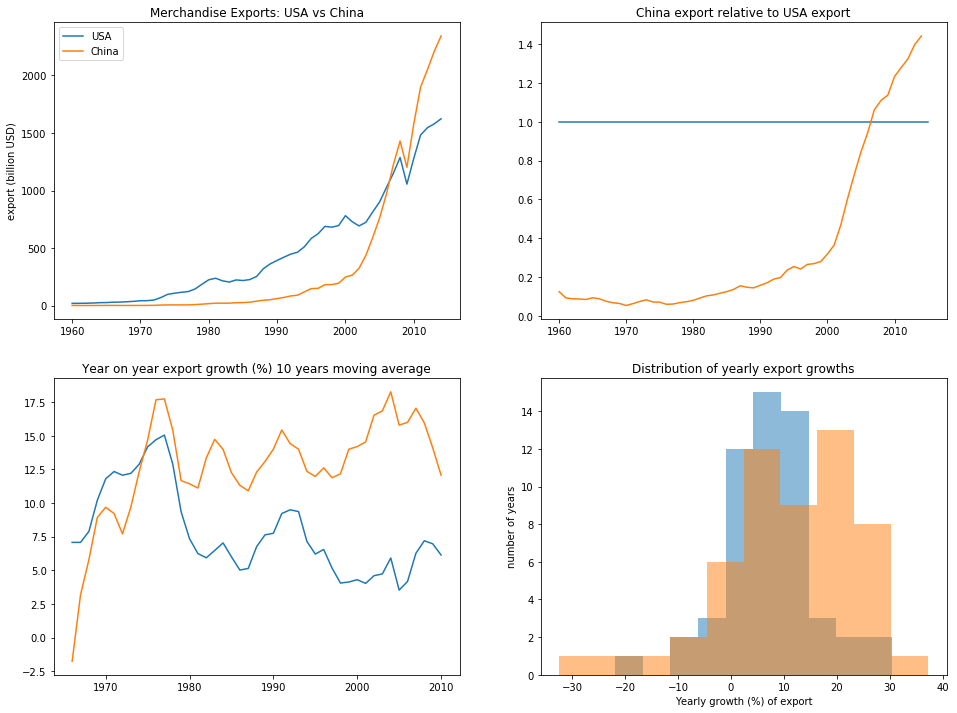

In [13]:
plt.gcf().set_size_inches(16, 12)

# yearly evolution of the exports of China and the USA
plt.subplot(221)
plt.plot(exports['ExportUsa'], label="USA")
plt.plot(exports['ExportChn'], label="China")
plt.title('Merchandise Exports: USA vs China')
plt.ylabel('export (billion USD)')
plt.legend()

# How China catched up
plt.subplot(222)
plt.plot(exports['UsaWrtUsa'], label="USA")
plt.plot(exports['ChnWrtUsa'], label="China")
plt.title('China export relative to USA export')

# Evolution of the year on year export growth
plt.subplot(223)
plt.plot(exports['percentDeltaUsaMA'], label="USA")
plt.plot(exports['percentDeltaChnMA'], label="China")
plt.title('Year on year export growth (%) 10 years moving average')

# Distribution of the yearly growth percentages for both countries
plt.subplot(224)
plt.hist(exports['percentDeltaUsa'].dropna(), 10, normed=False, label='USA', alpha=0.5)
plt.hist(exports['percentDeltaChn'].dropna(), 10, normed=False, label='China',  alpha=0.5)
plt.xlabel('Yearly growth (%) of export')
plt.ylabel('number of years')
plt.title('Distribution of yearly export growths')
plt.show()

* 50 years ago the USA exported 10 times as much as China
* In 2007 China overtook the USA as the biggest exporting country
* Since the late seventies export growth rates of the USA continuously declined while those of China kept increasing
* Over the past 30 years China’s average export growth rate was significantly above 10%
* Since 2000 China’s yearly export growth topped 20% in 7 years, the maximum yearly growth for the USA exports in that period was 17%

### Other research topics
* Correlation between Merchants Export and other indicators (eg GDP, labor cost, pollution, eductation, ...)
* Exports vs imports evolution